In [1]:
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan import Observer, FixedTarget

#Plotting Airmass
%matplotlib inline
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range

from astroplan.plots import plot_airmass


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [24]:
#setting up my target
M31 = FixedTarget.from_name("M82")

In [25]:
#Observing from observatory location
APO =  Observer(longitude = -105.820278 * u.deg,
        latitude = 32 * u.deg + 46 * u.arcmin + 49 * u.arcsec,
        elevation = 2788 * u.m,
        timezone = 'Mexico/BajaSur',
        name = "Apache Point Observatory"
        )


In [26]:
#setting up times to observe
current_time = APO.timezone
observing_time = Time("2019-04-30 00:00:00")
observing_time2 = Time("2019-12-31 00:00:00")
midnight_APO = APO.midnight(observing_time, which='nearest')

In [27]:
#twilight to twilight times for observing
astro_set = APO.twilight_evening_astronomical(observing_time, which='nearest')
astro_rise = APO.twilight_morning_astronomical(observing_time, which='next')
midnight_APO = APO.midnight(observing_time, which='next')

You can observe for 7.6 h at APO tonight
True


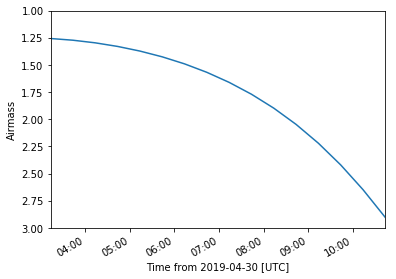

In [28]:
#Observing length on Dec 31 2019
#Observing time based on night time (Twilight to twilight)
observing_length = (astro_rise - astro_set).to(u.h)

start_time = astro_set
end_time = astro_rise
#time to observe without destroying the CCD with the sun
observing_range = [astro_set, astro_rise]

time_grid = time_grid_from_range(observing_range)

#plotting how long to view object based on airmass
plot_airmass(M31, APO, time_grid);
print("You can observe for {0:.1f} at APO tonight".format(observing_length))
print(APO.target_is_up(midnight_APO, M31))


You can observe for 11.0 h at APO tonight
True


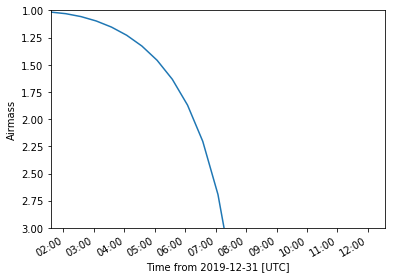

In [23]:
#same as above code but for observing timne 2

astro_set2 = APO.twilight_evening_astronomical(observing_time2, which='nearest')
astro_rise2 = APO.twilight_morning_astronomical(observing_time2, which='next')
midnight_APO2 = APO.midnight(observing_time2, which='next')

#Observing length on Apr 16 2019
observing_length2 = (astro_rise2 - astro_set2).to(u.h)
start_time = astro_set2
end_time = astro_rise2

observing_range2 = [astro_set2, astro_rise2]

time_grid2 = time_grid_from_range(observing_range2)
plot_airmass(M31, APO, time_grid2);
print("You can observe for {0:.1f} at APO tonight".format(observing_length2))
print(APO.target_is_up(midnight_APO2, M31))


In [35]:
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination

In [37]:
#Moon illumination on observing time
moon_observing = get_body('moon',observing_time)
moon_illumination(observing_time)

0.21625726075472407

In [41]:
#Best season to observe
M31.ra.hms

hms_tuple(h=0.0, m=42.0, s=44.32999920000029)

So when the sun is opposite the M31 (12-13 hrs) would be in the autumn months (Sept.)